In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import json

config = {}
with open('config.json') as config_json:
    config = json.load(config_json)

In [2]:
data = pd.read_csv('{}_{}_{}_stock_data.csv'.format(config['company'], config['params']['range'], config['params']['interval']), index_col=0)

print('Importing {} Stock Data'.format(config['company']))
data.describe()

Importing TSLA Stock Data


,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,114.412843,117.065351,111.725713,114.639151,114.639151,4.403244e+07
std,149.138341,152.982736,145.296760,149.755428,149.755428,3.069148e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,8.297500e+06
25%,48.432999,49.172499,47.508000,48.418499,48.418499,2.412012e+07
50%,62.329000,63.235000,61.097000,62.152999,62.152999,3.477150e+07
75%,72.789499,73.985002,71.141001,72.558003,72.558003,5.217925e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


<AxesSubplot:xlabel='Date'>

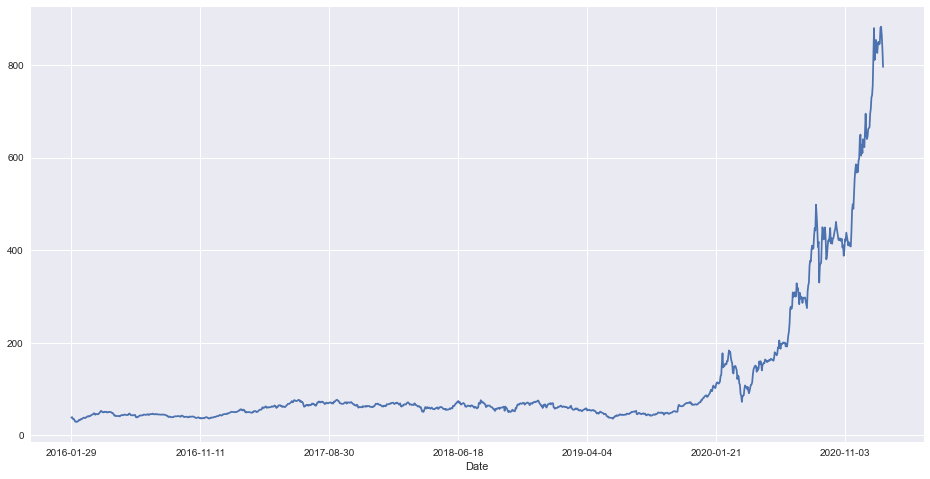

In [3]:
plt.figure(figsize= (16,8))
data.Close.plot()

In [4]:
data['100ma'] = data['Close'].rolling(window= 100, min_periods= 0).mean()
data.shape

(1260, 7)

In [5]:
data.dropna(inplace= True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2016-01-29,37.990002,38.748001,37.616001,38.240002,38.240002,14261500,38.240002
2016-02-01,37.751999,39.903999,36.549999,39.388000,39.388000,26488000,38.814001
2016-02-02,38.484001,38.624001,36.046001,36.556000,36.556000,28868000,38.061334
2016-02-03,36.717999,36.787998,34.035999,34.695999,34.695999,39657000,37.220000
2016-02-04,34.139999,35.195999,33.397999,35.066002,35.066002,21927000,36.789201


In [6]:
#Create Dataframe that only has the 'Close' column.

c_data = data.filter(['Close'])
c_data.head()

,Close
Date,
2016-01-29,38.240002
2016-02-01,39.388000
2016-02-02,36.556000
2016-02-03,34.695999
2016-02-04,35.066002


to predict you must take some of the first values and use them to predict the same value some point in the future
eg, use the first 30 values of closing price to predict the 31st, each time you make a prediction you move that window forward such that value X is predicted using values ranging from X-30: X

[follow this guide](https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/)

In [7]:
c_data_val = c_data.values

train_data = c_data_val[:int(len(c_data) * .66)]
test_data = c_data_val[int(len(c_data) * .66):]

print(len(train_data), len(test_data), len(train_data) + len(test_data), len(c_data))

831 429 1260 1260


In [9]:
x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])

x_test_data, y_test_data = [], []
for i in range(60, len(test_data)):
    x_test_data.append(test_data[i-60:i,0])
    y_test_data.append(test_data[i,0])


x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data= np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1]))

x_test_data, y_test_data = np.array(x_test_data), np.array(y_test_data)
x_test_data= np.reshape(x_test_data, (x_test_data.shape[0], x_test_data.shape[1]))

xtd= x_train_data.reshape(771, 60)
xtd.shape
y_test_data.shape

(369,)

In [10]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators= 1000, learning_rate= 0.05, n_jobs= 3)
xgb_model.fit(xtd, y_train_data,
            early_stopping_rounds= 5,
            eval_set= [(x_test_data, y_test_data)],
                verbose= True)

[0]	validation_0-rmse:334.07391
[1]	validation_0-rmse:331.64371
[2]	validation_0-rmse:329.32950
[3]	validation_0-rmse:327.14362
[4]	validation_0-rmse:325.10754
[5]	validation_0-rmse:323.13452
[6]	validation_0-rmse:321.28867
[7]	validation_0-rmse:319.56854
[8]	validation_0-rmse:317.87543
[9]	validation_0-rmse:316.27521
[10]	validation_0-rmse:314.82193
[11]	validation_0-rmse:313.37839
[12]	validation_0-rmse:312.06094
[13]	validation_0-rmse:310.76092
[14]	validation_0-rmse:309.54584
[15]	validation_0-rmse:308.37842
[16]	validation_0-rmse:307.23859
[17]	validation_0-rmse:306.14420
[18]	validation_0-rmse:305.09793
[19]	validation_0-rmse:304.15277
[20]	validation_0-rmse:303.20978
[21]	validation_0-rmse:302.37732
[22]	validation_0-rmse:301.53378
[23]	validation_0-rmse:300.73062
[24]	validation_0-rmse:300.00632
[25]	validation_0-rmse:299.27191
[26]	validation_0-rmse:298.59619
[27]	validation_0-rmse:297.91736
[28]	validation_0-rmse:297.32483
[29]	validation_0-rmse:296.72611
[30]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=3, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
from sklearn.metrics import mean_absolute_error
prediction = xgb_model.predict(x_test_data)

score = mean_absolute_error(y_test_data, prediction)

print('mean absolute error of prediction is: {}'.format(score))

valid_data= pd.DataFrame(c_data.Close[-369:])
valid_data['Predict']= prediction

valid_data


mean absolute error of prediction is: 190.0937200094785


,Close,Predict
Date,,
2019-08-14,43.924000,46.774185
2019-08-15,43.127998,43.475891
2019-08-16,43.987999,43.481121
2019-08-19,45.366001,43.498569
2019-08-20,45.172001,44.873852
...,...,...
2021-01-25,880.799988,70.603951
2021-01-26,883.090027,70.603951
2021-01-27,864.159973,70.603951


<AxesSubplot:xlabel='Date'>

<Figure size 1152x576 with 0 Axes>

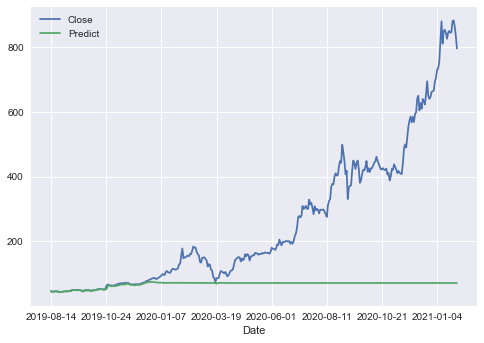

In [12]:
plt.figure(figsize= (16,8))
valid_data.plot()